<a href="https://colab.research.google.com/github/nidamarina/Skyline-Math-2000/blob/main/Notebook_2_Setup_by_Nida_Currier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question: Is there an association between off-day wakeup time and marijuana usage? : 

---





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import researchpy as rp

In [2]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


Codebook 1: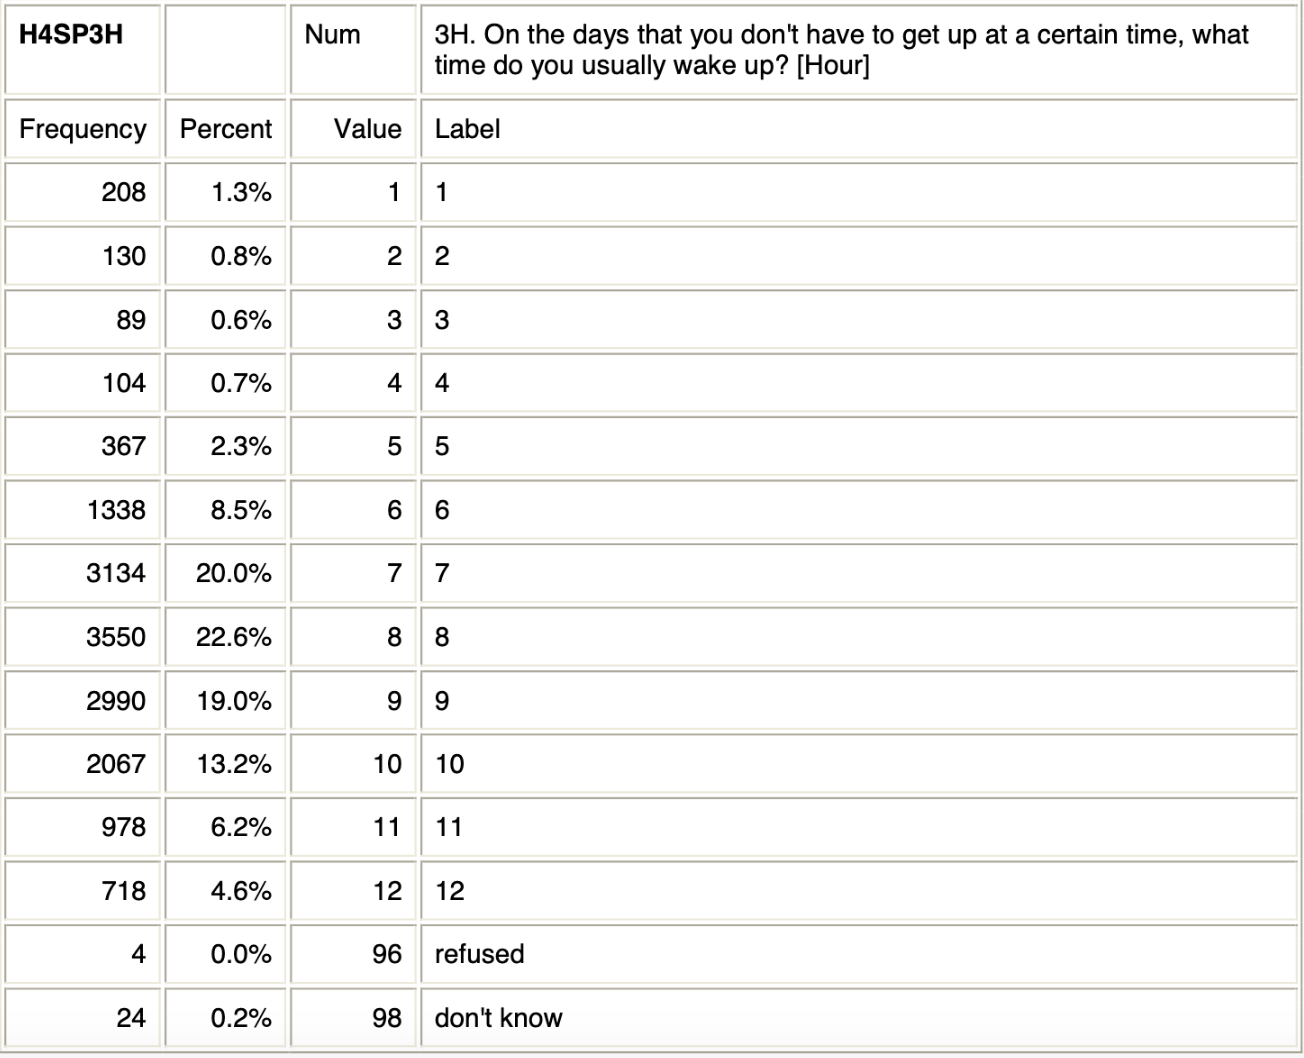

In [3]:
#Manage data for variable 1
df['H4SP3T'].dtype

dtype('O')

In [4]:
df['offday_wakeup'] = df['H4SP3T']
df['offday_wakeup'].dtype

dtype('O')

In [5]:
df['offday_wakeup'] = pd.to_numeric(df['offday_wakeup'] , errors= 'coerce')
df['offday_wakeup'].dtype

dtype('float64')

In [6]:
df['offday_wakeup'] = df['offday_wakeup'].loc[ df['offday_wakeup'] < 96]
df['offday_wakeup'].max()

8.0

In [7]:
df['offday_wakeup'].describe()

count    5114.000000
mean        1.097575
std         0.375858
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: offday_wakeup, dtype: float64

In [8]:
df['H4SP3T'].value_counts()

1    4655
     1390
2     452
8       6
6       1
Name: H4SP3T, dtype: int64

In [9]:
df['offday_wakeup'] = df['H4SP3T']
df['offday_wakeup']= pd.to_numeric(df['offday_wakeup'],errors= 'coerce')
df['offday_wakeup']= df['offday_wakeup'].loc[df['offday_wakeup'] < 96]
df['offday_wakeup']= df['offday_wakeup'].loc[df['offday_wakeup'] != ' ']
df['offday_wakeup'].value_counts()

1.0    4655
2.0     452
8.0       6
6.0       1
Name: offday_wakeup, dtype: int64

In [10]:
df['Am_Pm_Wakeup']=df['H4SP3T']
df['Am_Pm_Wakeup'] = df['Am_Pm_Wakeup'].loc[df['Am_Pm_Wakeup'] !=' ']
df['Am_Pm_Wakeup'] = df['Am_Pm_Wakeup'].loc[df['Am_Pm_Wakeup'] <'6']
df['Am_Pm_Wakeup'].replace(['1','2'],['AM','PM'],inplace=True)
df['Am_Pm_Wakeup'].value_counts()


AM    4655
PM     452
Name: Am_Pm_Wakeup, dtype: int64

In [11]:
#hours
df['H4SP3H'].value_counts()

      1390
8     1167
7     1035
9      934
10     674
6      425
11     316
12     238
5      130
1       73
4       45
2       39
3       30
98       7
96       1
Name: H4SP3H, dtype: int64

In [12]:
df['Hour_Wakeup'] = df['H4SP3H']
df['Hour_Wakeup']= pd.to_numeric(df['Hour_Wakeup'],errors= 'coerce')
df['Hour_Wakeup']= df['Hour_Wakeup'].loc[df['Hour_Wakeup'] < 96]
df['Hour_Wakeup']= df['Hour_Wakeup'].loc[df['Hour_Wakeup'] != ' ']
df['Hour_Wakeup'].value_counts()

8.0     1167
7.0     1035
9.0      934
10.0     674
6.0      425
11.0     316
12.0     238
5.0      130
1.0       73
4.0       45
2.0       39
3.0       30
Name: Hour_Wakeup, dtype: int64

In [13]:
#minutes
df['H4SP3M'].value_counts()

0     3777
      1390
30    1195
45      44
15      28
3       28
20      10
1        9
98       7
40       4
10       4
50       2
35       1
39       1
48       1
96       1
55       1
2        1
Name: H4SP3M, dtype: int64

In [14]:
df['Minutes_Wakeup']= df['H4SP3M']
df['Minutes_Wakeup']= pd.to_numeric(df['Minutes_Wakeup'],errors= 'coerce')
df['Minutes_Wakeup']= df['Minutes_Wakeup'].loc[df['Minutes_Wakeup'] < 96]
df['Minutes_Wakeup']= df['Minutes_Wakeup'].loc[df['Minutes_Wakeup'] != ' ']
df['Minutes_Wakeup'].value_counts()

0.0     3777
30.0    1195
45.0      44
15.0      28
3.0       28
20.0      10
1.0        9
40.0       4
10.0       4
50.0       2
55.0       1
48.0       1
39.0       1
35.0       1
2.0        1
Name: Minutes_Wakeup, dtype: int64

In [15]:
df_time_convert= df[['Am_Pm_Wakeup','Hour_Wakeup','Minutes_Wakeup']]

In [16]:
df_time_convert.dropna(inplace=True)

<ipython-input-16-9f90cf800d75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert.dropna(inplace=True)


In [18]:
def to_military_time_float(in_hour,in_min,am_pm):
  out_time = 0
  if in_hour == '12':

    if am_pm == 'AM': 
      out_time = 0
    else:
      out_time = int(in_hour)
  
  elif (0 < int(in_hour) < 12):
    if am_pm == 'AM':
      out_time = int(in_hour)
    else:
      out_time = int(in_hour) + 12
  
  

  out_min = int(in_min) / 60

  out_time += out_min 




  return out_time

In [19]:
to_military_time_float('9','30','AM')

9.5

In [20]:
df_time_convert['Time Value (float)'] = df_time_convert.apply(lambda x: to_military_time_float(x['Hour_Wakeup'],x['Minutes_Wakeup'],x['Am_Pm_Wakeup']),axis = 1)
#axis=1, to the column, apply the values 
df_time_convert

<ipython-input-20-c81b70828788>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_convert['Time Value (float)'] = df_time_convert.apply(lambda x: to_military_time_float(x['Hour_Wakeup'],x['Minutes_Wakeup'],x['Am_Pm_Wakeup']),axis = 1)


,Am_Pm_Wakeup,Hour_Wakeup,Minutes_Wakeup,Time Value (float)
1,AM,7.0,30.0,7.500000
3,AM,9.0,0.0,9.000000
7,AM,6.0,30.0,6.500000
9,PM,2.0,0.0,14.000000
11,AM,5.0,0.0,5.000000
...,...,...,...,...
6499,AM,10.0,0.0,10.000000
6500,AM,8.0,0.0,8.000000
6501,AM,5.0,30.0,5.500000
6502,AM,8.0,2.0,8.033333


In [21]:
df_time_convert.loc[df_time_convert['Time Value (float)'] > 24]

,Am_Pm_Wakeup,Hour_Wakeup,Minutes_Wakeup,Time Value (float)


In [22]:
df= df.assign(Offday_Wakeup_Times= df_time_convert['Time Value (float)'])

In [23]:
df

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7,offday_wakeup,Am_Pm_Wakeup,Hour_Wakeup,Minutes_Wakeup,Offday_Wakeup_Times
0,5710027,2,,,,,,,,,...,,,,,,NaN,NaN,NaN,NaN,NaN
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,2,1,1.0,AM,7.0,30.0,7.500000
2,5710317,1,,,,,,,,,...,,,,,,NaN,NaN,NaN,NaN,NaN
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,4,1,1.0,AM,9.0,0.0,9.000000
4,5710455,2,,,,,,,,,...,,,,,,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,9971993,2,14.26027397,6,7,2008,2288373,373,2,V5.4,...,0,0,0,4,2,1.0,AM,10.0,0.0,10.000000
6500,9971993,1,,2,13,2008,2288343,343,1,V5.1,...,0,0,0,3,2,1.0,AM,8.0,0.0,8.000000
6501,9971997,1,15.09315068,3,22,2008,2288325,325,1,V5.2,...,0,0,0,4,3,1.0,AM,5.0,30.0,5.500000
6502,9971997,2,15.50958904,4,1,2008,2288325,325,2,V5.2,...,0,0,0,3,2,1.0,AM,8.0,2.0,8.033333


In [24]:
df['Hour_Wakeup']

0        NaN
1        7.0
2        NaN
3        9.0
4        NaN
        ... 
6499    10.0
6500     8.0
6501     5.0
6502     8.0
6503     7.0
Name: Hour_Wakeup, Length: 6504, dtype: float64

In [25]:
df['Offday_Wakeup_Times']

0             NaN
1        7.500000
2             NaN
3        9.000000
4             NaN
          ...    
6499    10.000000
6500     8.000000
6501     5.500000
6502     8.033333
6503     7.500000
Name: Offday_Wakeup_Times, Length: 6504, dtype: float64

In [26]:
df['Offday_Wakeup_Times'].max()

23.5

In [27]:
df['Offday_Wakeup_Times'].mean()

8.250365582974279

In [28]:
df['Offday_Wakeup_Times'].mode()

0    8.0
Name: Offday_Wakeup_Times, dtype: float64

In [29]:
df['Offday_Wakeup_Times'].median()

8.0

In [17]:
#Graphs and tables or statistics
df_time_convert

,Am_Pm_Wakeup,Hour_Wakeup,Minutes_Wakeup
1,AM,7.0,30.0
3,AM,9.0,0.0
7,AM,6.0,30.0
9,PM,2.0,0.0
11,AM,5.0,0.0
...,...,...,...
6499,AM,10.0,0.0
6500,AM,8.0,0.0
6501,AM,5.0,30.0
6502,AM,8.0,2.0


In [30]:
df['Offday_Wakeup_Times'].describe()

count    5106.000000
mean        8.250366
std         2.877545
min         0.000000
25%         7.000000
50%         8.000000
75%         9.500000
max        23.500000
Name: Offday_Wakeup_Times, dtype: float64

<Axes: xlabel='Offday_Wakeup_Times', ylabel='Percent'>

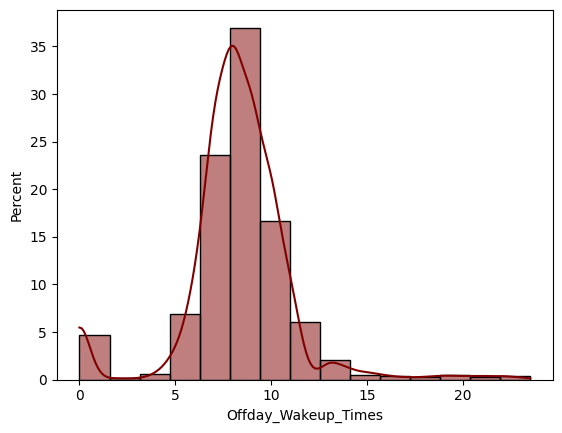

In [32]:
sns.histplot(x = 'Offday_Wakeup_Times', data =df, stat='percent', bins = 15, color = 'maroon',kde =True)

<Axes: xlabel='Offday_Wakeup_Times'>

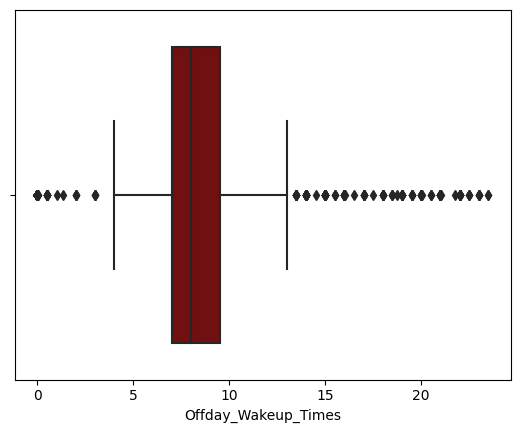

In [33]:
sns.boxplot(x = 'Offday_Wakeup_Times', data =df, color ='maroon')

In [38]:
rp.summary_cont(df['Offday_Wakeup_Times'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Offday_Wakeup_Times,5106.0,8.2504,2.8775,0.0403,8.1714,8.3293


Codebook 2 Question: Have you ever used any of the following drugs?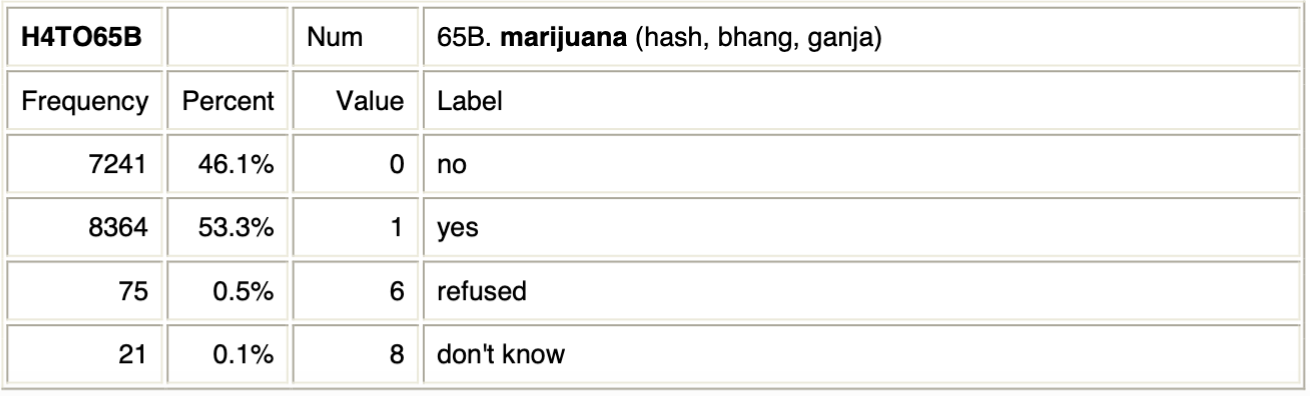

In [42]:
#Manage data for variable 1
df['Marijuana_Usage'] = df['H4TO65B']
df['Marijuana_Usage'].value_counts()

1    2778
0    2300
     1390
6      26
8      10
Name: Marijuana_Usage, dtype: int64

In [43]:
df['Marijuana_Usage'] = df['Marijuana_Usage'].loc[df['Marijuana_Usage'] !='7']
df['Marijuana_Usage'] = df['Marijuana_Usage'].loc[df['Marijuana_Usage'] !='6']
df['Marijuana_Usage'] = df['Marijuana_Usage'].loc[df['Marijuana_Usage'] !='8']
df['Marijuana_Usage'] = df['Marijuana_Usage'].loc[df['Marijuana_Usage'] !=' ']
df['Marijuana_Usage'].value_counts()

1    2778
0    2300
Name: Marijuana_Usage, dtype: int64

In [44]:
df['Marijuana_Usage'].replace(['0', '1'] , ['NO' , 'Yes'] , inplace = True)
df['Marijuana_Usage'].value_counts()

Yes    2778
NO     2300
Name: Marijuana_Usage, dtype: int64

In [45]:
#Graphs and tables or statistics
rp.summary_cat(df['Marijuana_Usage'])

,Variable,Outcome,Count,Percent
0,Marijuana_Usage,Yes,2778,54.71
1,,NO,2300,45.29


<Axes: title={'center': 'Have you ever tried marijuana?'}, ylabel='Marijuana_Usage'>

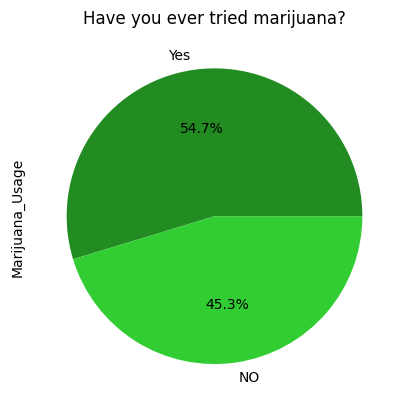

In [47]:
plt.title("Have you ever tried marijuana?")
df['Marijuana_Usage'].value_counts().plot(kind ='pie', autopct='%1.1f%%', colors=['forestgreen', 'limegreen'])

<Axes: title={'center': 'Have you ever tried marijuana?'}, xlabel='Marijuana Usage', ylabel='Percent'>

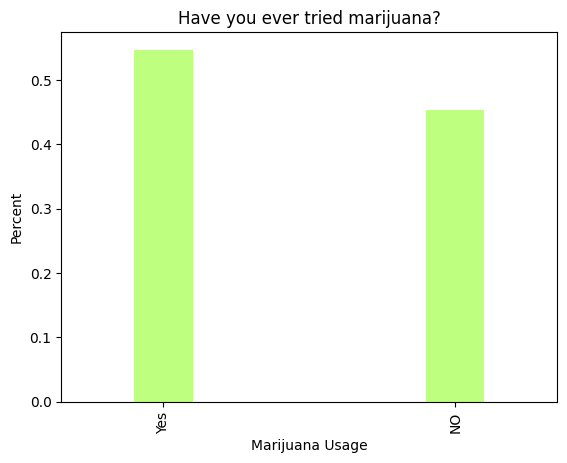

In [59]:
plt.xlabel("Marijuana Usage")
plt.ylabel("Percent")
plt.title("Have you ever tried marijuana?")
df['Marijuana_Usage'].value_counts(normalize = True).plot(kind ='bar', color = 'chartreuse', width = 0.2, alpha = 0.5)